<a href="https://colab.research.google.com/github/lisosoma/BI_STATISTICS/blob/main/bi_hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import scipy
import itertools
from math import pi, sin, cos, sqrt, exp
import statsmodels.stats as stat

#### Задача 1.

Получим выборку объема 100 из стандартного нормального распределения.

In [ ]:
distrib_0 = [sts.norm.rvs(loc = 0, scale = 1, size = 100) for i in range(100)]

Значения параметров alpha поместим в список.

In [ ]:
alpha = [0, 0.1, 0.5, 0.8, 0.95]

Далее напишем функции, которые будут возвращать выборки размером 100 из смесей распределений, указанных в задании.

Стандартное нормальное распределение и распределение Коши.

In [ ]:
def distrib1(alpha):
    distrib1 = []
    uni = sts.uniform.rvs(size = 100)
    for i in range(100):
        if uni[i] <= alpha:
            distrib1.append(float(sts.norm.rvs(loc = 0, scale = 1, size = 1)))
        else:
            distrib1.append(float(sts.cauchy.rvs(loc = 0, scale = 1, size = 1)))
    return distrib1

Стандартное нормальное распределение и два экспоненциальных.

In [ ]:
def distrib2(alpha):
    distrib2 = []
    uni = sts.uniform.rvs(size = 100)
    for i in range(100):
        if uni[i] <= alpha:
            distrib2.append(float(sts.norm.rvs(loc = 0, scale = 1, size = 1)))
        elif uni[i] <= (1 + alpha) / 2:
            distrib2.append(float(sts.expon.rvs(loc = 0, scale = 1, size = 1)))
        else:
            distrib2.append(-float(sts.expon.rvs(loc = 0, scale = 1, size = 1)))
    return distrib2

Стандартное нормальное распределение и равномерное.

In [ ]:
def distrib3(alpha):
    distrib3 = []
    uni = sts.uniform.rvs(size = 100)
    for i in range(100):
        if uni[i] <= alpha:
            distrib3.append(float(sts.norm.rvs(loc = 0, scale = 1, size = 1)))
        else:
            distrib3.append(float(sts.uniform.rvs(loc = -2, scale = 4, size = 1)))
    return distrib3

В качестве еще одного распределения возьмем смесь из стандартного нормального распределения и распределения Лапласа с параметрами 0 и 1.

In [ ]:
def distrib4(alpha):
    distrib4 = []
    uni = sts.uniform.rvs(size = 100)
    for i in range(100):
        if uni[i] <= alpha:
            distrib4.append(float(sts.norm.rvs(loc = 0, scale = 1, size = 1)))
        else:
            distrib4.append(float(sts.laplace.rvs(loc = 0, scale = 1, size = 1)))
    return distrib4

Генерируем выборки размером 100 для каждого распределения с 5 возможными значениями alpha.

In [ ]:
distrib_1 = [[distrib1(alpha[i]) for j in range(100)] for i in range(5)]
distrib_2 = [[distrib2(alpha[i]) for j in range(100)] for i in range(5)]
distrib_3 = [[distrib3(alpha[i]) for j in range(100)] for i in range(5)]
distrib_4 = [[distrib4(alpha[i]) for j in range(100)] for i in range(5)]

Функция для вычисления эмпирической функции распределения p-value.

In [ ]:
def Fn_pvalue(pvalue):
    pvalue.sort()
    F_n = [0 for i in range(100)]
    for i in range(100):
        j = 0
        while((pvalue[j] <= pvalue[i]) and j < 99):
            F_n[i] += 1
            j += 1
        F_n[i] /= 100
    f = 0
    for i in range(100):
        if pvalue[i] > 0.01 and pvalue[i] < 0.05:     
            print('Оценка ошибки второго рода для 0.01 < p < 0.05 равна', 1 - F_n[i])
            f = 1
            break
    if f == 0:
        print('Оценка ошибки второго рода для p < 0.001 равна', 1 - F_n[0])      
        
    return [pvalue, F_n]

Функция для построения эмпирических функций распределения.

In [ ]:
def shapiro(s):
    fig = plt.figure(figsize=(15, 15))
    for i in range(5):
        s_ = np.array(s[i]).transpose()
        F_ = Fn_pvalue(s_[1])
        plt.subplot(3, 2, i + 1)
        plt.plot(F_[0], F_[1])

##### Применим критерий Шапиро-Уилка к выборкам.

In [ ]:
shapiro1 = [[sts.shapiro(distrib_1[j][i]) for i in range(100)] for j in range(5)]
shapiro2 = [[sts.shapiro(distrib_2[j][i]) for i in range(100)] for j in range(5)]
shapiro3 = [[sts.shapiro(distrib_3[j][i]) for i in range(100)] for j in range(5)]
shapiro4 = [[sts.shapiro(distrib_4[j][i]) for i in range(100)] for j in range(5)]

Функции распределения p-value для первой смеси распределений.

Оценка ошибки второго рода для p < 0.001 равна 0.99
Оценка ошибки второго рода для p < 0.001 равна 0.99
Оценка ошибки второго рода для p < 0.001 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.09999999999999998
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.43000000000000005


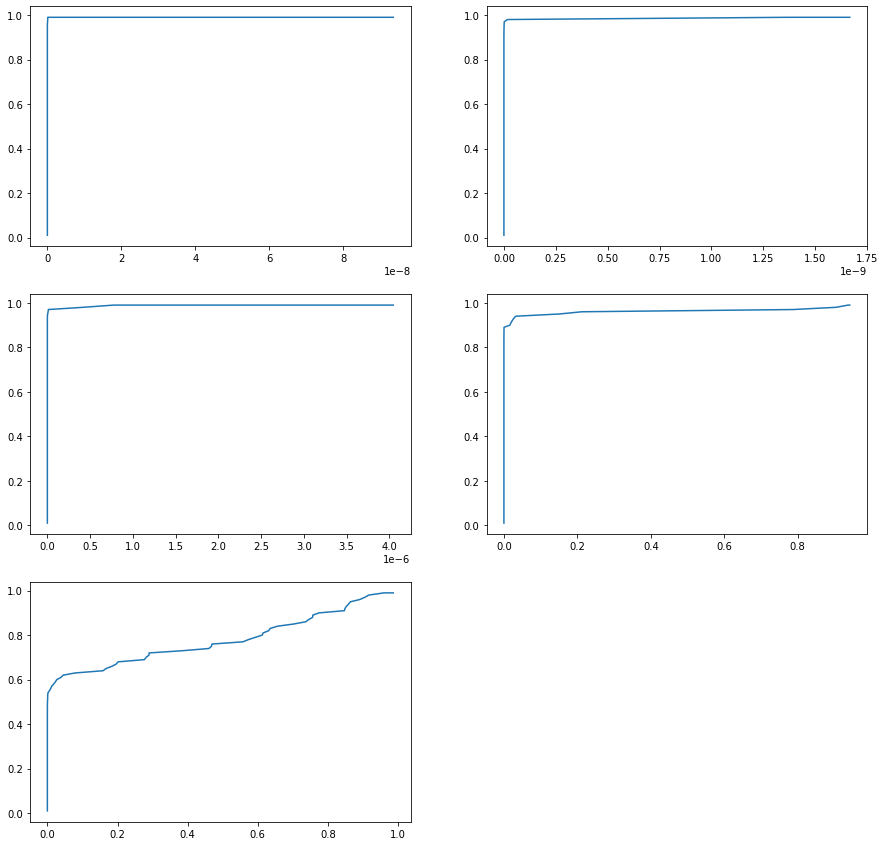

In [ ]:
shapiro(shapiro1)

Функции распределения p-value для второй смеси распределений.

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.39
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.41000000000000003
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.5900000000000001
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.79
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.96


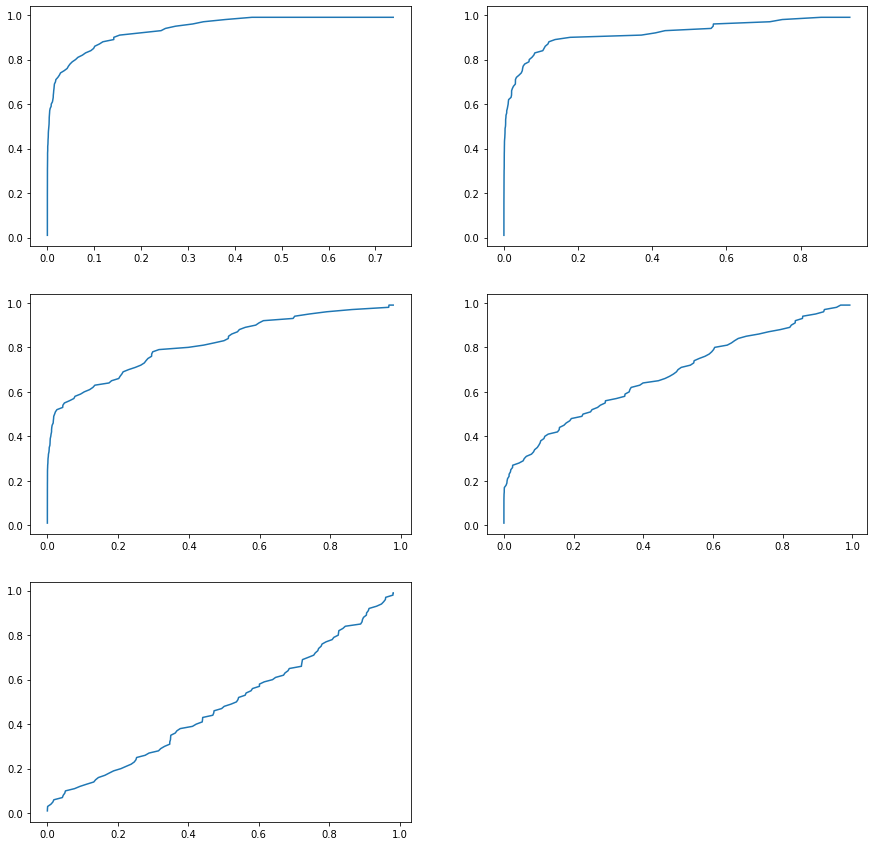

In [ ]:
shapiro(shapiro2)

Функции распределения p-value для третьей смеси распределений.

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.030000000000000027
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.14
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.87
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99


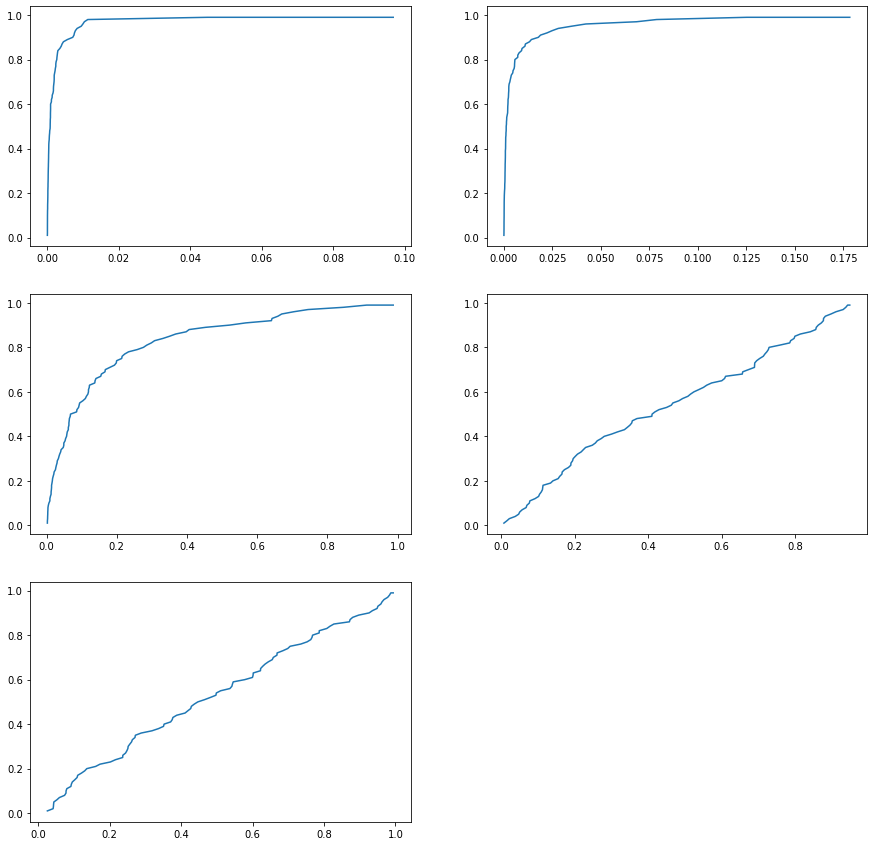

In [ ]:
shapiro(shapiro3)

Функции распределения p-value для четвертой смеси распределений.

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.38
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.35
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.55
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.78
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.9


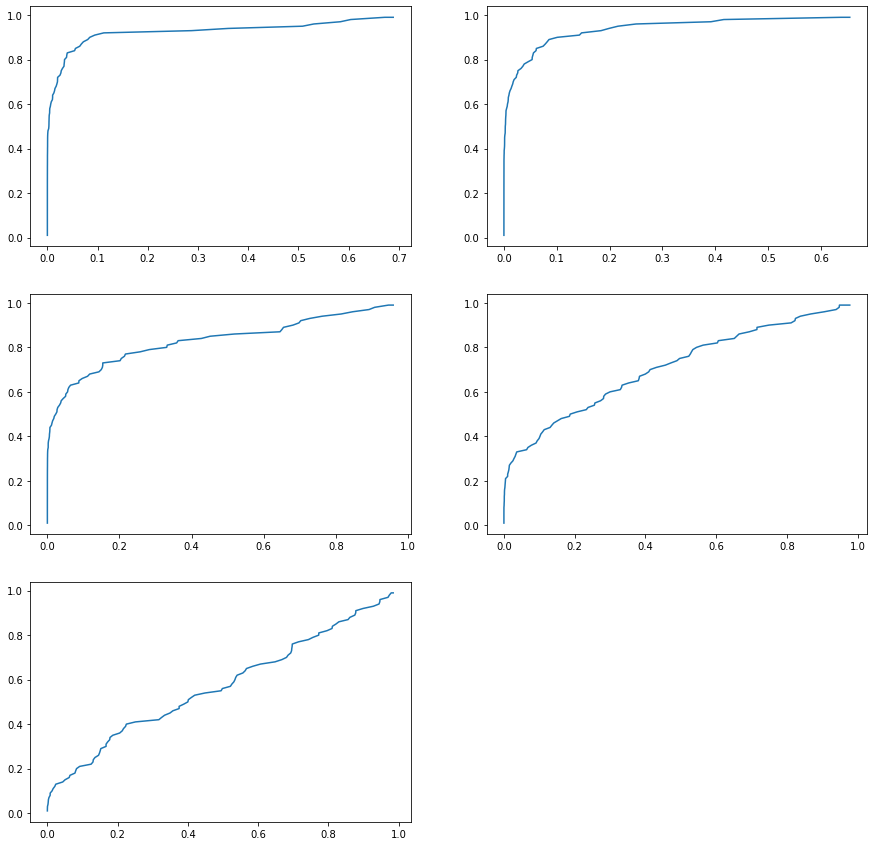

In [ ]:
shapiro(shapiro4)

##### Применим критерий Фроцини к выборкам.

С помощью метода Монте-Карло промоделируем функцию распределения статистики критерия Фроцини.

In [ ]:
B = []
array = [(i - 0.5) / 100 for i in range(1, 101)]
for i in range(5000):
    X = sts.norm.rvs(loc = 0, scale = 1, size = 100)
    X.sort()
    F = [sts.norm.cdf(x = X[i], loc=0, scale=1) for i in range(100)]
    sum__ = 0 
    for i in range(100):
         sum__ += abs(F[i] - array[i])
    B.append(1 / 10 * sum__)

Функция, возвращающая p-value и рассчитывающая статистику критерия Фроцини. 

In [ ]:
def pvalue_Froc(Z):
    array = [(i - 0.5) / 100 for i in range(1, 101)]
    Z.sort()
    F_ = [sts.norm.cdf(x = Z[i], loc=0, scale=1) for i in range(100)]
    sum_ = 0
    k = 0
    for i in range(100):
        sum_ += abs(F_[i] - array[i])
    b = 1 / 10 * sum_
    for i in range(5000):
        if b < B[i]:
            k += 1
    return k / 5000            

Теперь зададим функцию, которая будет вычислять значения Z по выборкам.

In [ ]:
def Z_calc(X):
    m = sum(X) / 100
    s = 0
    for i in range(100):
        s += (X[i] - m) ** 2
    s /= 99
    Z = [(X[i] - m) / sqrt(s) for i in range(100)]
    return Z

Посчитаем значения Z для всех выборок.

In [ ]:
z_1 = [[Z_calc(distrib_1[j][i]) for i in range(100)] for j in range(5)]
z_2 = [[Z_calc(distrib_2[j][i]) for i in range(100)] for j in range(5)]
z_3 = [[Z_calc(distrib_3[j][i]) for i in range(100)] for j in range(5)]
z_4 = [[Z_calc(distrib_4[j][i]) for i in range(100)] for j in range(5)]

С помощью написанной ранее функции посчитаем значения p-value.

In [ ]:
p_1 = [[pvalue_Froc(z_1[j][i]) for i in range(100)] for j in range(5)]

In [ ]:
p_2 = [[pvalue_Froc(z_2[j][i]) for i in range(100)] for j in range(5)]
p_3 = [[pvalue_Froc(z_3[j][i]) for i in range(100)] for j in range(5)]
p_4 = [[pvalue_Froc(z_4[j][i]) for i in range(100)] for j in range(5)]

Функция, реализующая построение графиков эмпирических функций распределения p-value.

In [ ]:
def frocini(s):
    fig = plt.figure(figsize=(15, 15))
    for i in range(5):
        F_ = Fn_pvalue(s[i])
        plt.subplot(3, 2, i + 1)
        plt.plot(F_[0], F_[1])

Функции распределения p-value для первой смеси распределений.

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.010000000000000009
Оценка ошибки второго рода для p < 0.001 равна 0.020000000000000018
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.030000000000000027
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.33999999999999997
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.75


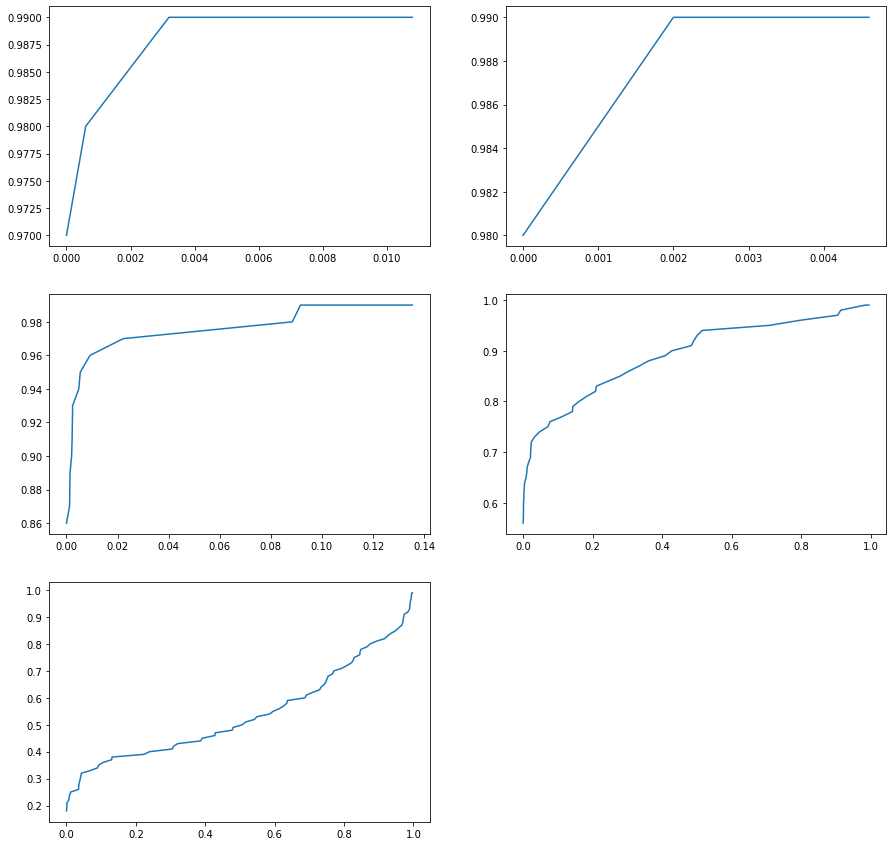

In [ ]:
frocini(p_1)

Функции распределения p-value для второй смеси распределений.

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для p < 0.001 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для p < 0.001 равна 0.99


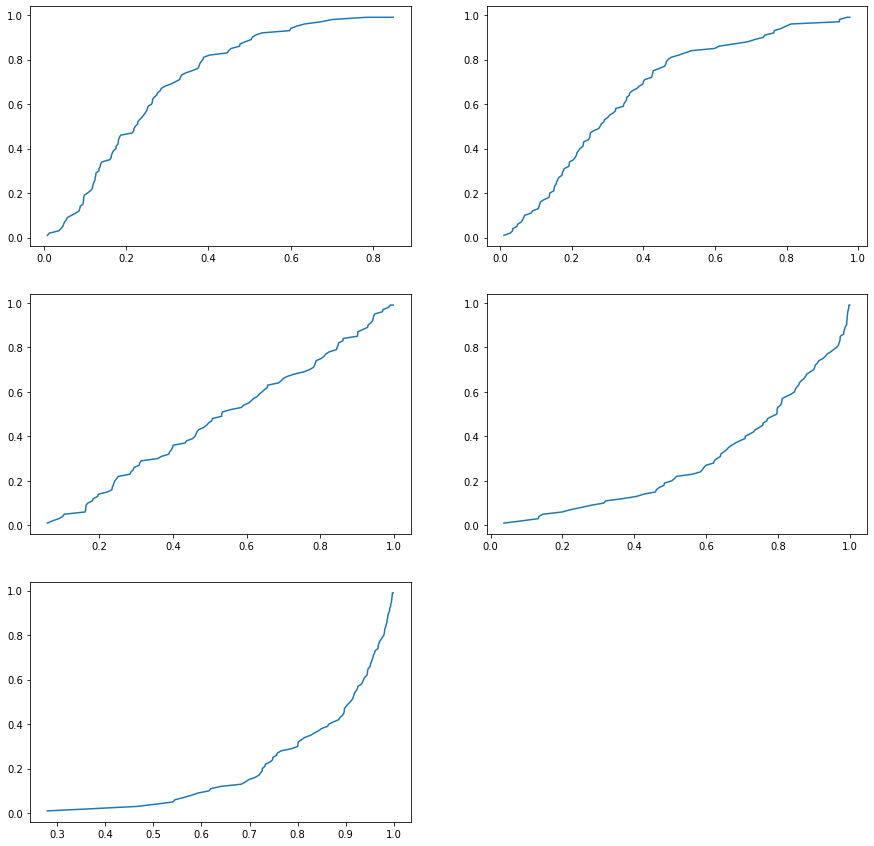

In [ ]:
frocini(p_2)

Функции распределения p-value для третьей смеси распределений.

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для p < 0.001 равна 0.99
Оценка ошибки второго рода для p < 0.001 равна 0.99
Оценка ошибки второго рода для p < 0.001 равна 0.99


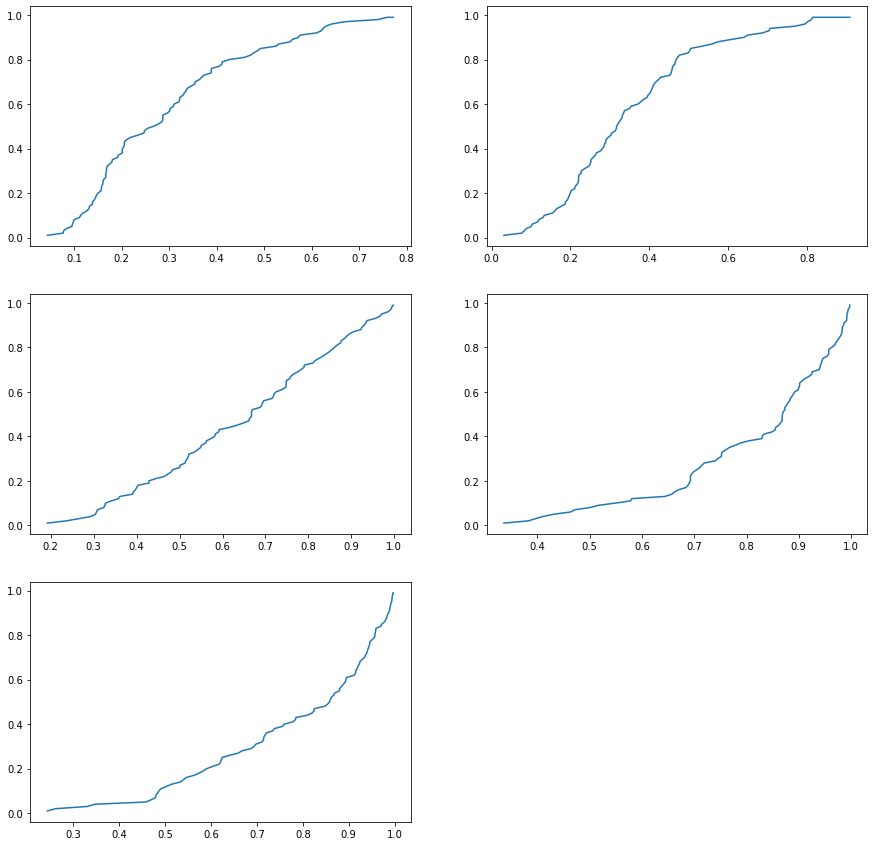

In [ ]:
frocini(p_3)

Функции распределения p-value для четвертой смеси распределений.

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для p < 0.001 равна 0.99


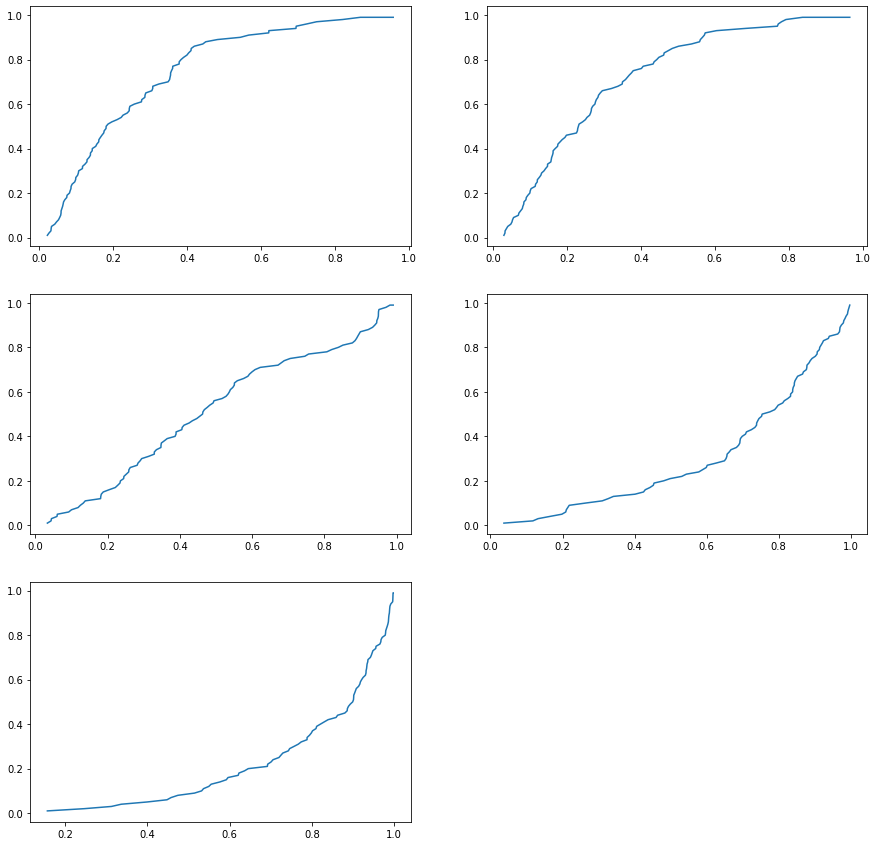

In [ ]:
frocini(p_4)

##### Применим модифицированный критерий хи-квадрат к выборкам.

Функция, возвращающая значение p-value для модифицированного критерия хи-квадрат.

In [ ]:
def chi_pvalue(X):
    array = [sts.norm.ppf(q = 0.1 * i, loc=0, scale=1) for i in range(1, 10)]
    v = [0 for i in range(10)]
    for x in X:
        for i in range(8):
            if x > array[i] and x <= array[i + 1]:
                v[i + 1] += 1 
            elif x <= array[0]:
                v[0] += 1
            else:
                v[9] += 1
    T_n = 0
    
    for i in range(10):
        T_n += (v[i] / 100 - 1 / 10) ** 2
    T_n /= 10
    return 1 - sts.chi.cdf(x = T_n, df = 8)

Функция, реализующая вывод графиков эмпирической функции распределения p-value.

In [ ]:
def chi_mod(s):
    fig = plt.figure(figsize=(15, 15))
    for i in range(5):
        F_ = Fn_pvalue(s[i])
        plt.subplot(3, 2, i + 1)
        plt.plot(F_[0], F_[1])

Сгенерируем значения p-value.

In [ ]:
p_1chi = [[chi_pvalue(distrib_1[j][i]) for i in range(100)] for j in range(5)]
p_2chi = [[chi_pvalue(distrib_2[j][i]) for i in range(100)] for j in range(5)]
p_3chi = [[chi_pvalue(distrib_3[j][i]) for i in range(100)] for j in range(5)]
p_4chi = [[chi_pvalue(distrib_4[j][i]) for i in range(100)] for j in range(5)]

Функции распределения p-value для первой смеси распределений.

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.96


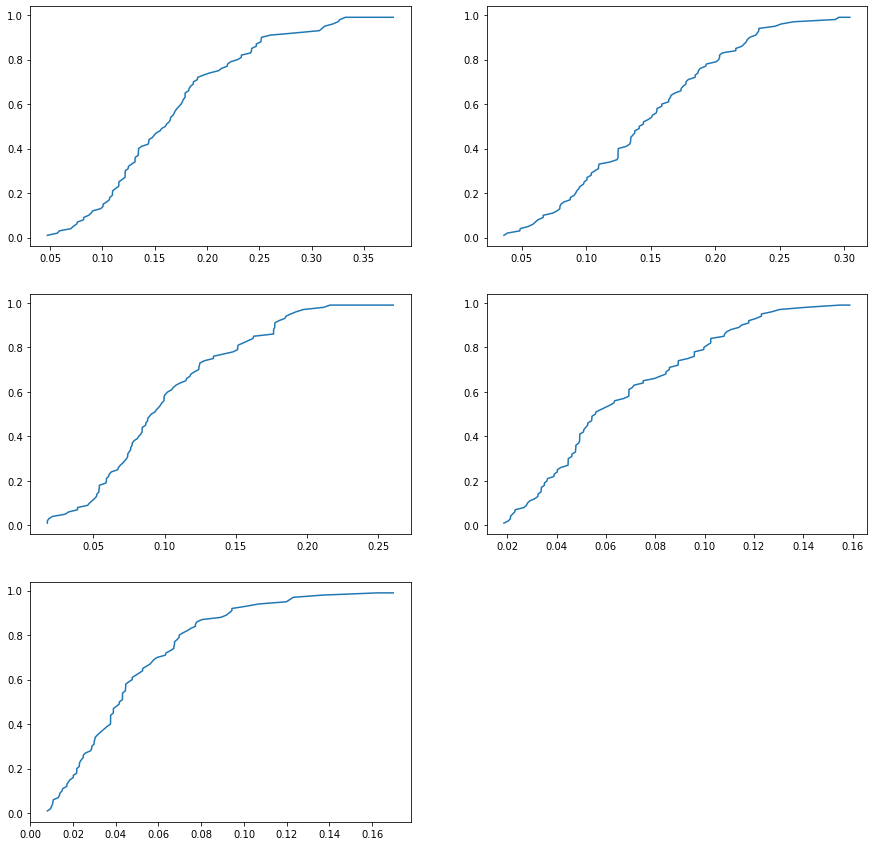

In [ ]:
chi_mod(p_1chi)

Функции распределения p-value для второй смеси распределений.

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99


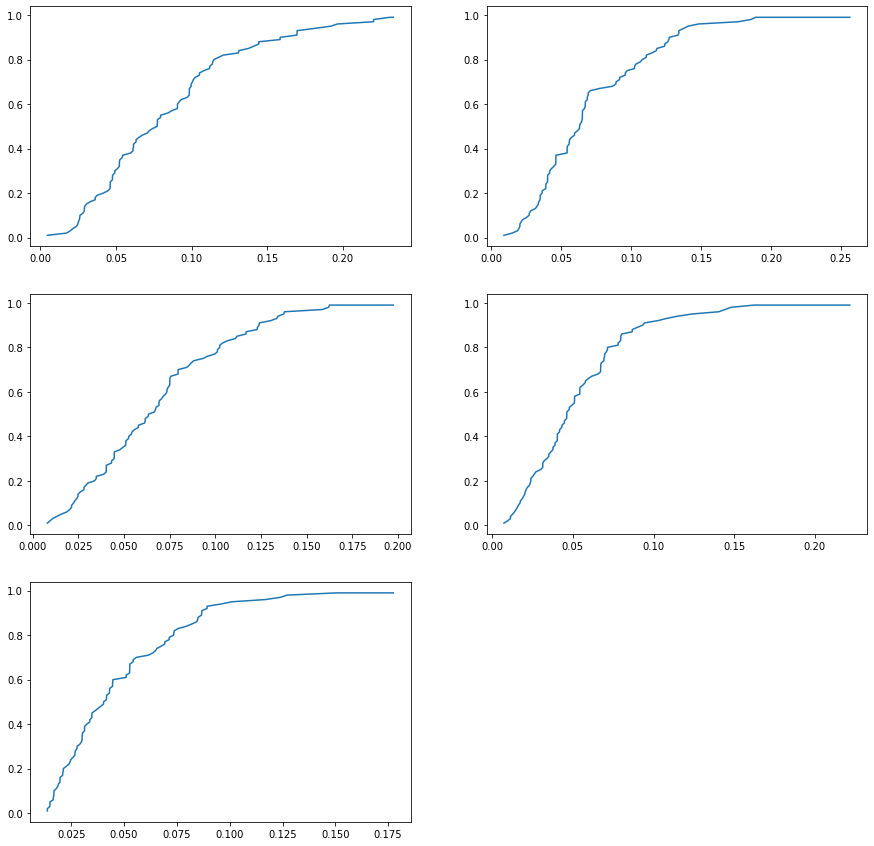

In [ ]:
chi_mod(p_2chi)

Функции распределения p-value для третьей смеси распределений.

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.95


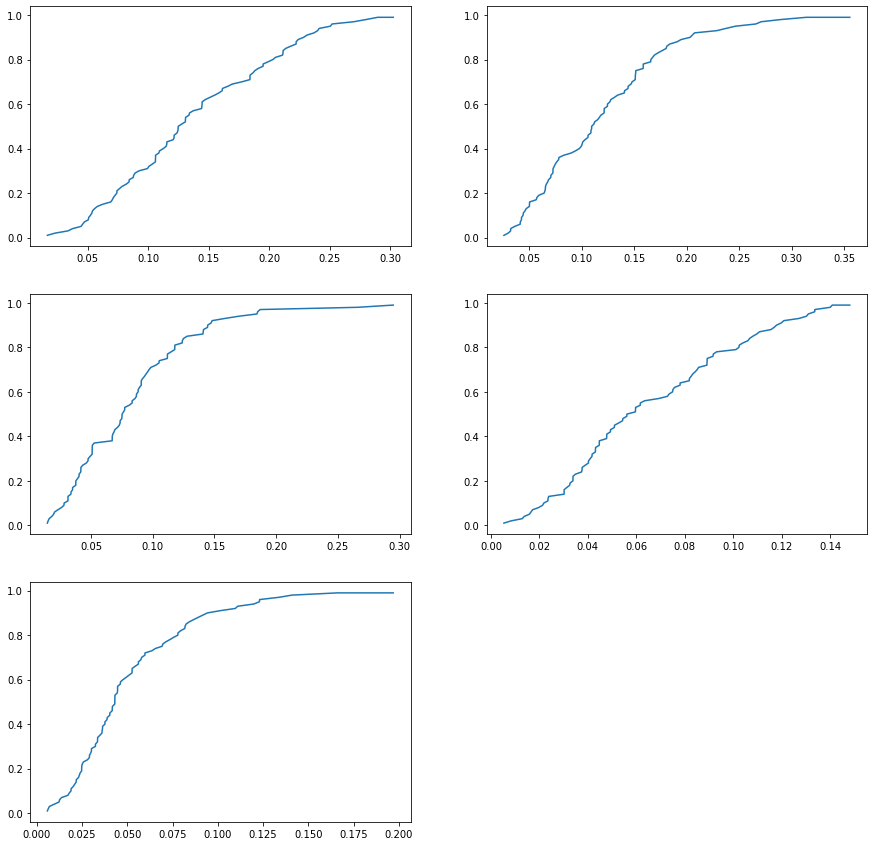

In [ ]:
chi_mod(p_3chi)

Функции распределения p-value для четвертой смеси распределений.

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97


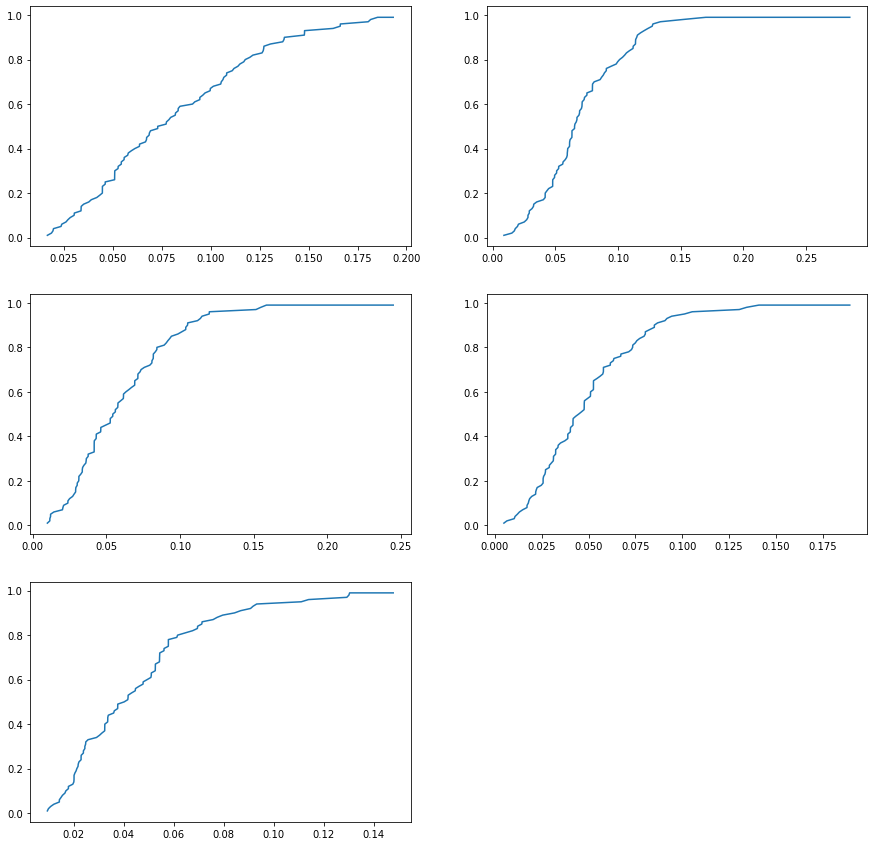

In [ ]:
chi_mod(p_4chi)

##### Применим энтропийный критерий Васичека к выборкам.

In [ ]:
K = []
m = 20
for i in range(5000):
    X = sts.norm.rvs(loc = 0, scale = 1, size = 100)
    X.sort()
    M = sum(X) / 100
    s = 0
    for i in range(100):
        s += (X[i] - M) ** 2
    s /= 99
    k = 1
    for i in range(100):
        if i - m <= 0:
            k *= (X[i + m] - X[0]) 
        elif i + m >= 99:
            k *= (X[99] - X[i - m])
        else:
            k *= (X[m + i] - X[i - m])
    K.append(5 / 2 / sqrt(s) * (k ** (1 / 100)))

In [ ]:
def pvalue_Vsk(X):
    l = 0
    X = sts.norm.rvs(loc = 0, scale = 1, size = 100)
    X.sort()
    M = sum(X) / 100
    s = 0
    for i in range(100):
        s += (X[i] - M) ** 2
    s /= 99
    k = 1
    for i in range(100):
        if i - m <= 0:
            k *= (X[i + m] - X[0]) 
        elif i + m >= 99:
            k *= (X[99] - X[i - m])
        else:
            k *= (X[m + i] - X[i - m])
    p = 5 / 2 / sqrt(s) * (k ** (1 / 100))
    for i in range(5000):
        if p < K[i]:
            l += 1
    return  l / 5000 

In [ ]:
p_1vsk = [[pvalue_Vsk(distrib_1[j][i]) for i in range(100)] for j in range(5)]
p_2vsk = [[pvalue_Vsk(distrib_2[j][i]) for i in range(100)] for j in range(5)]
p_3vsk = [[pvalue_Vsk(distrib_3[j][i]) for i in range(100)] for j in range(5)]
p_4vsk = [[pvalue_Vsk(distrib_4[j][i]) for i in range(100)] for j in range(5)]

In [ ]:
def vsk(s):
    fig = plt.figure(figsize=(15, 15))
    for i in range(5):
        F_ = Fn_pvalue(s[i])
        plt.subplot(3, 2, i + 1)
        plt.plot(F_[0], F_[1])

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.96
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97


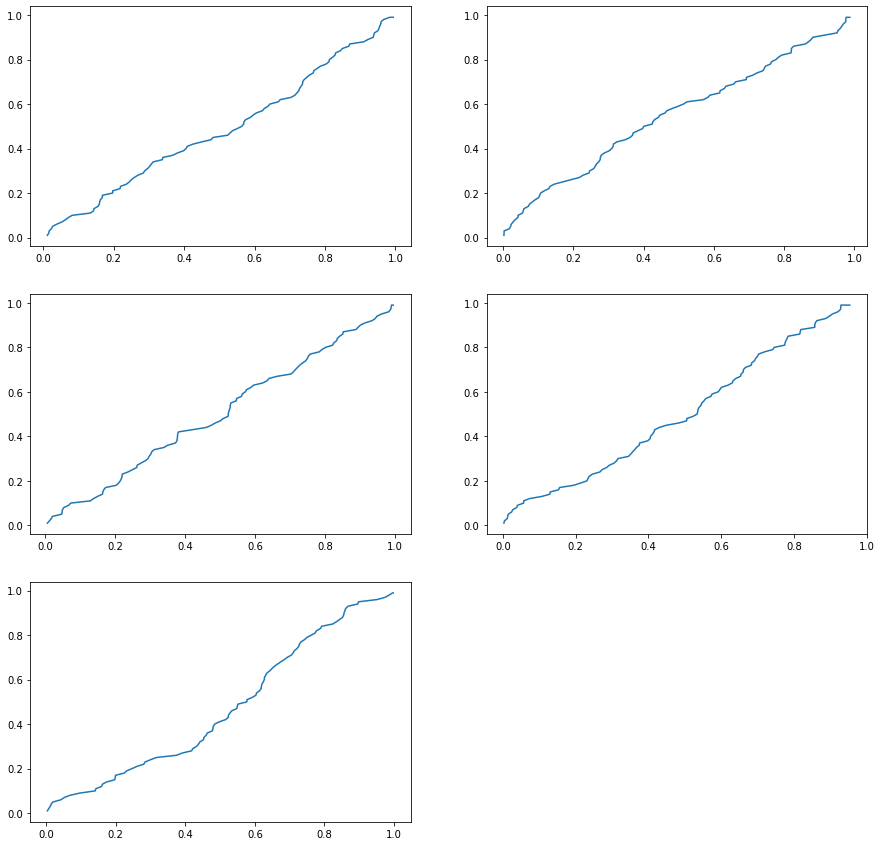

In [ ]:
vsk(p_1vsk)

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.96
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99


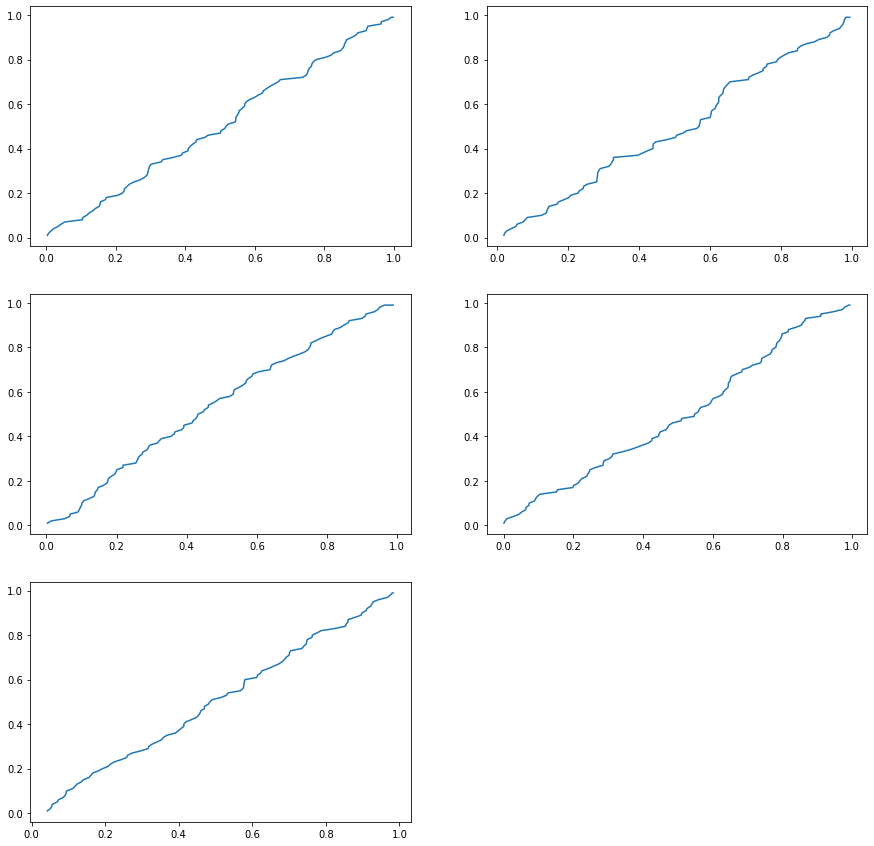

In [ ]:
vsk(p_2vsk)

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98


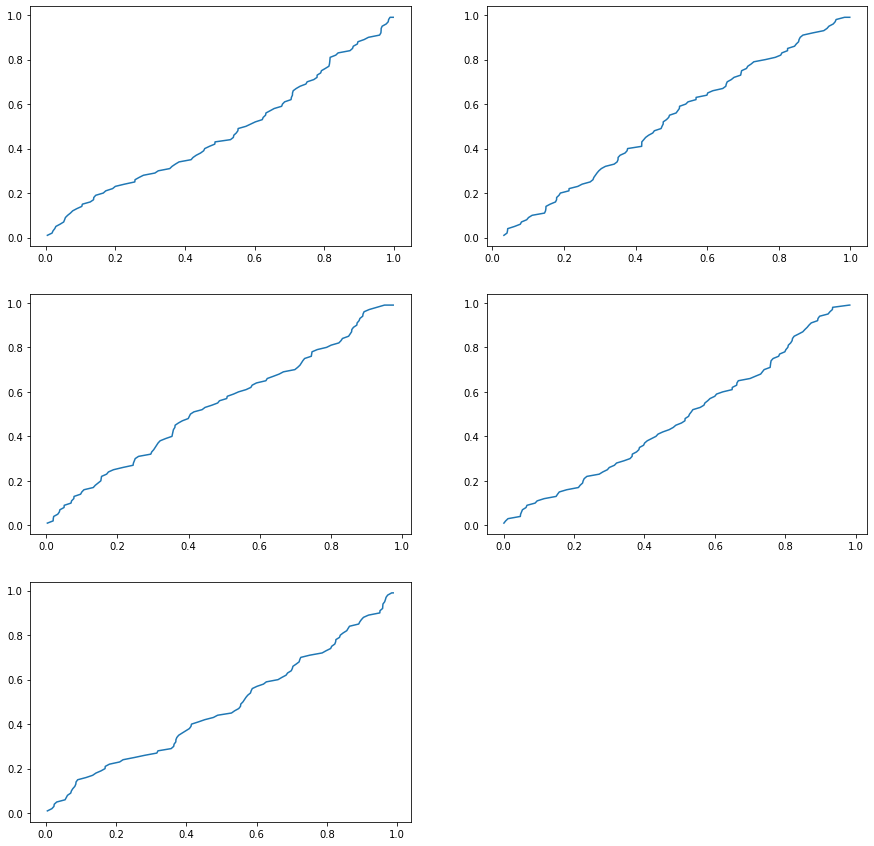

In [ ]:
vsk(p_3vsk)

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98


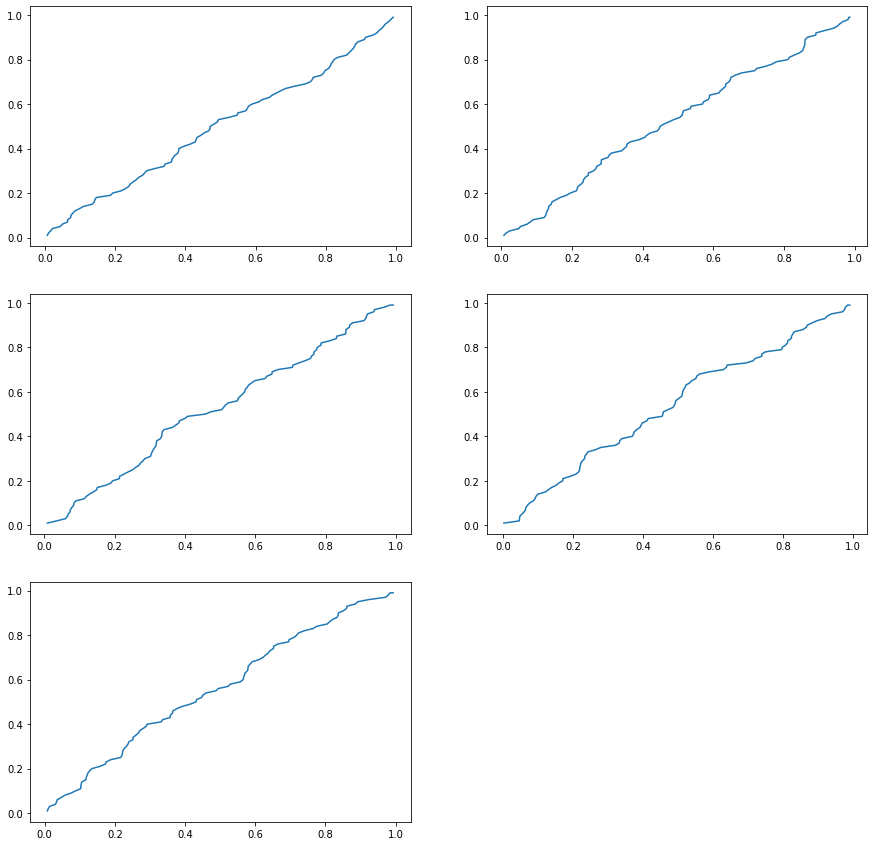

In [ ]:
vsk(p_4vsk)

##### Применим критерий Лиллиефорса к выборкам.

In [ ]:
def dmax(X):
    X.sort()
    F_t = [sts.norm.cdf(x = X[i]) for i in range(100)] 
    F_n = [0 for i in range(100)]
    for i in range(100):
        j = 0
        while((X[j] <= X[i]) and j < 99):
            F_n[i] += 1
            j += 1
        F_n[i] /= 100

    D_n = [abs(F_n[i] - F_t[i]) for i in range(100)]
    return  max(D_n)

In [ ]:
p_1lf = [[1 - sts.ksone.cdf(x = dmax(distrib_1[j][i]), n = 100) for i in range(100)] for j in range(5)]
p_2lf = [[1 - sts.ksone.cdf(x = dmax(distrib_2[j][i]), n = 100) for i in range(100)] for j in range(5)]
p_3lf = [[1 - sts.ksone.cdf(x = dmax(distrib_3[j][i]), n = 100) for i in range(100)] for j in range(5)]
p_4lf = [[1 - sts.ksone.cdf(x = dmax(distrib_4[j][i]), n = 100) for i in range(100)] for j in range(5)]

In [ ]:
def lilliefors(s):
    fig = plt.figure(figsize=(15, 15))
    for i in range(5):
        F_ = Fn_pvalue(s[i])
        plt.subplot(3, 2, i + 1)
        plt.plot(F_[0], F_[1])

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.43999999999999995
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.54
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.9299999999999999
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98


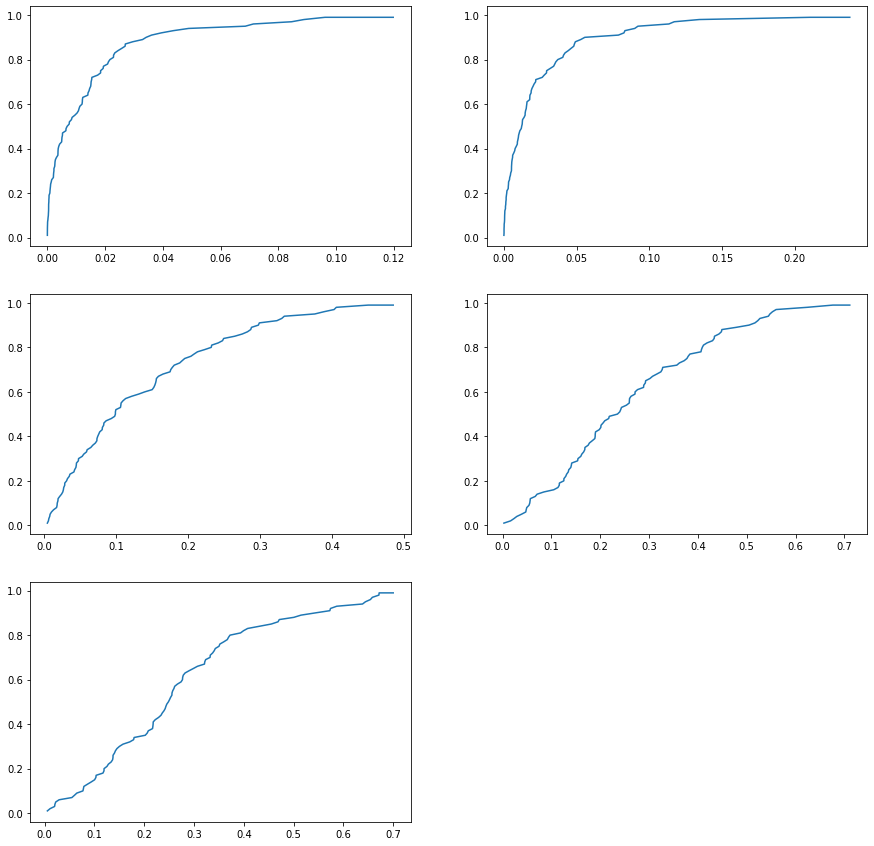

In [ ]:
lilliefors(p_1lf)

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.96
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99


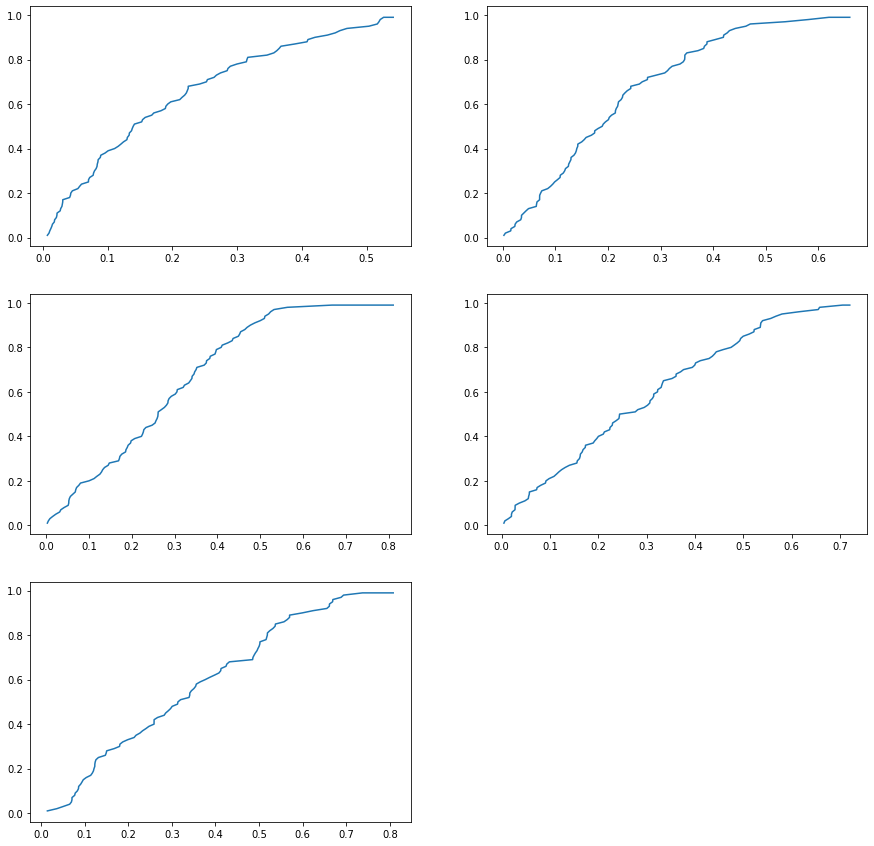

In [ ]:
lilliefors(p_2lf)

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.5900000000000001
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.6699999999999999
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.89
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99


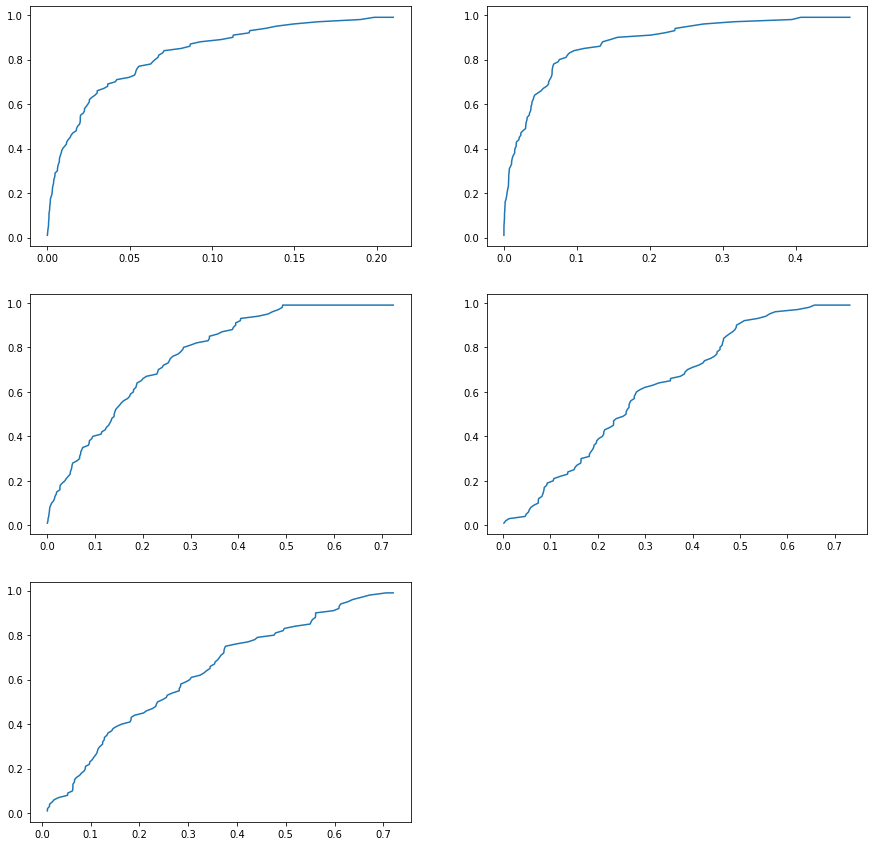

In [ ]:
lilliefors(p_3lf)

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97
Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98


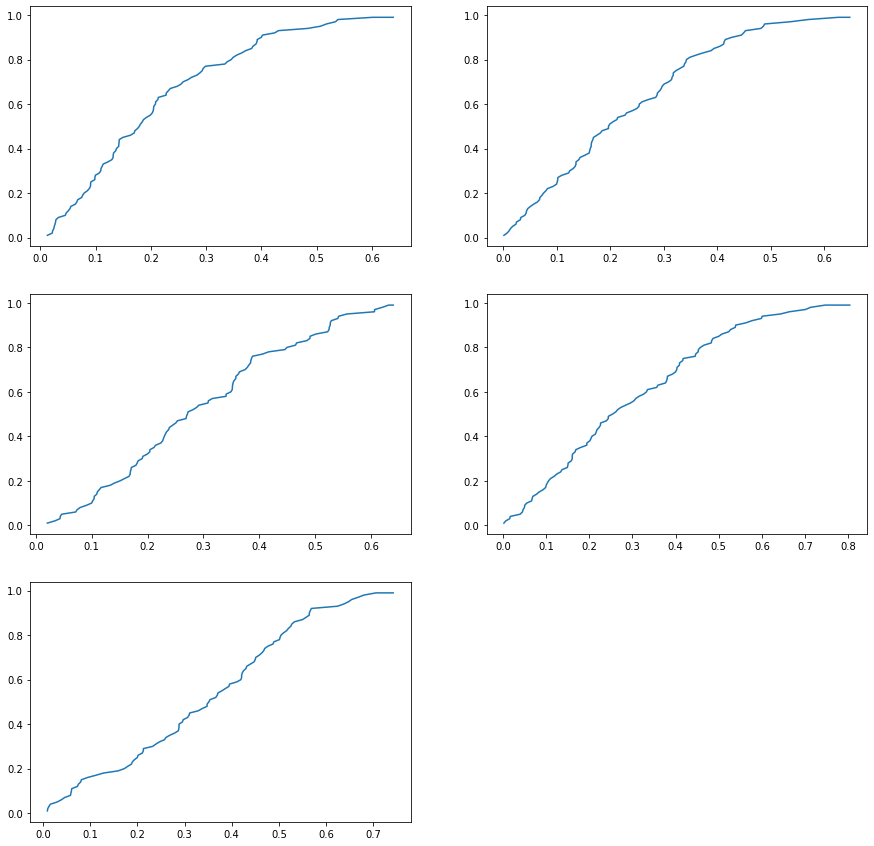

In [ ]:
lilliefors(p_4lf)

#### Задача 2.

In [ ]:
def distrib5(s = 1):
    prob = [0.3, 0.05, 0.05, 0.05, 0.05, 
              0.05, 0.05, 0.05, 0.05, 0.3]         # список со значениями функции вероятности p(xi = N)
    cumprob = list(itertools.accumulate(prob))     # список со значениями функции распределения p(xi <= N)
    
    uniform = sts.uniform.rvs(loc=0, scale=1, size=s, random_state=None)     # моделируем список случайных величин,
                                                                             # имеющих равномерное распределение на [0, 1]
        
    distrib = []       # в данном списке будем хранить значения случайных величин из распределения F (для 1.a)
    for i in range(s):
        for j in range(9):
            if uniform[i] <= cumprob[j + 1] and uniform[i] > cumprob[j]:     # если случайная величина из равномерного
                                                                             # распределения попадает в интервал
                distrib.append(j + 2)                                        # добавляем в список m = j + 2 (как в лекциях)
        if uniform[i] <= cumprob[0]:                                         # условие для крайнего значения
            distrib.append(1)
    return distrib

In [ ]:
def distrib6(s = 1):
    prob = [0.15, 0.15, 0.1, 0.1, 0.1, 
            0.1, 0.05, 0.05, 0.1, 0.1]             # список со значениями функции вероятности p(xi = N)
    cumprob = list(itertools.accumulate(prob))     # список со значениями функции распределения p(xi <= N)
    
    uniform = sts.uniform.rvs(loc=0, scale=1, size=s, random_state=None)     # моделируем список случайных величин,
                                                                             # имеющих равномерное распределение на [0, 1]
        
    distrib = []       # в данном списке будем хранить значения случайных величин из распределения F (для 1.a)
    for i in range(s):
        for j in range(9):
            if uniform[i] <= cumprob[j + 1] and uniform[i] > cumprob[j]:     # если случайная величина из равномерного
                                                                             # распределения попадает в интервал
                distrib.append(j + 2)                                        # добавляем в список m = j + 2 (как в лекциях)
        if uniform[i] <= cumprob[0]:                                         # условие для крайнего значения
            distrib.append(1)
    return distrib

In [ ]:
def distrib7(s = 1):
    prob = [1/3, 1/9, 1/27, 1/81, 1/162, 
            1/162, 1/81, 1/27, 1/9, 1/3]            # список со значениями функции вероятности p(xi = N)
    cumprob = list(itertools.accumulate(prob))     # список со значениями функции распределения p(xi <= N)
    
    uniform = sts.uniform.rvs(loc=0, scale=1, size=s, random_state=None)     # моделируем список случайных величин,
                                                                             # имеющих равномерное распределение на [0, 1]
        
    distrib = []       # в данном списке будем хранить значения случайных величин из распределения F (для 1.a)
    for i in range(s):
        for j in range(9):
            if uniform[i] <= cumprob[j + 1] and uniform[i] > cumprob[j]:     # если случайная величина из равномерного
                                                                             # распределения попадает в интервал
                distrib.append(j + 2)                                        # добавляем в список m = j + 2 (как в лекциях)
        if uniform[i] <= cumprob[0]:                                         # условие для крайнего значения
            distrib.append(1)
    return distrib

In [ ]:
def distrib0(s = 1):
    prob = [0.1 for i in range(10)]                # список со значениями функции вероятности p(xi = N)
    cumprob = list(itertools.accumulate(prob))     # список со значениями функции распределения p(xi <= N)
    
    uniform = sts.uniform.rvs(loc=0, scale=1, size=s, random_state=None)     # моделируем список случайных величин,
                                                                             # имеющих равномерное распределение на [0, 1]
        
    distrib = []       # в данном списке будем хранить значения случайных величин из распределения F (для 1.a)
    for i in range(s):
        for j in range(9):
            if uniform[i] <= cumprob[j + 1] and uniform[i] > cumprob[j]:     # если случайная величина из равномерного
                                                                             # распределения попадает в интервал
                distrib.append(j + 2)                                        # добавляем в список m = j + 2 (как в лекциях)
        if uniform[i] <= cumprob[0]:                                         # условие для крайнего значения
            distrib.append(1)
    return distrib

In [ ]:
d5 = [distrib5(100) for i in range(100)]
d6 = [distrib6(100) for i in range(100)]
d7 = [distrib7(100) for i in range(100)]

In [ ]:
d0 = [distrib0(100) for i in range(100)]

##### Применим критерий Мана-Уитни к выборкам.

In [ ]:
mw1 = [sts.mannwhitneyu(d5[i], d0[0]) for i in range(100)]
mw2 = [sts.mannwhitneyu(d6[i], d0[0]) for i in range(100)]
mw3 = [sts.mannwhitneyu(d7[i], d0[0]) for i in range(100)]

In [ ]:
def mw(s):
    fig = plt.figure(figsize=(5, 5))
    s_ = np.array(s).transpose()
    F_ = Fn_pvalue(s_[1])
    plt.plot(F_[0], F_[1])

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.97


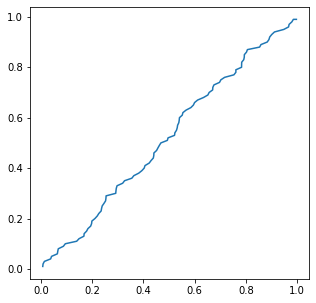

In [ ]:
mw(mw1)

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.79


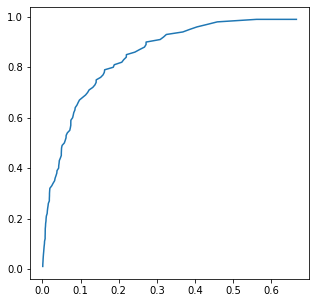

In [ ]:
mw(mw2)

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.99


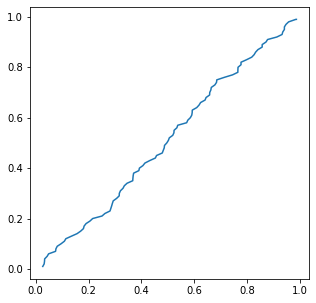

In [ ]:
mw(mw3)

##### Применим критерий однородности хи-квадрат к выборкам.

In [ ]:
p5 = [0.3, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.3]
p6 = [0.15, 0.15, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.1, 0.1]
p7 = [1/3, 1/9, 1/27, 1/81, 1/162, 1/162, 1/81, 1/27, 1/9, 1/3]

In [ ]:
def chi_hom(X, Y, px):
    v1, v2 = [0 for i in range(10)], [0 for i in range(10)]
    py = [0.1 for i in range(10)]
    for x in X:
        v1[int(x) - 1] += 1
    for y in Y:
        v2[int(y) - 1] += 1
    sum_ = 0
    for i in range(10):
        sum_ += (v1[i] - 100 * px[i]) ** 2 / px[i] / 100
        sum_ += (v2[i] - 100 * py[i]) ** 2 / py[i] / 100
    return sts.chi.cdf(x = sum_, df = 9 * 99)

In [ ]:
chi1 = [chi_hom(d5[i], d0[i], p5) for i in range(100)]
chi2 = [chi_hom(d6[i], d0[i], p6) for i in range(100)]
chi3 = [chi_hom(d7[i], d0[i], p7) for i in range(100)]

In [ ]:
def chi_h(s):
    fig = plt.figure(figsize=(5, 5))
    F_ = Fn_pvalue(s)
    plt.plot(F_[0], F_[1])

Оценка ошибки второго рода для p < 0.001 равна 0.96


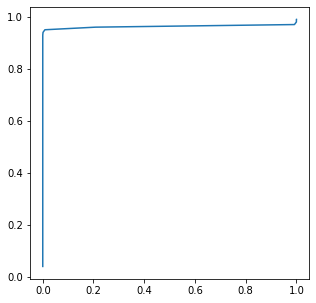

In [ ]:
chi_h(chi1)

Оценка ошибки второго рода для p < 0.001 равна 0.94


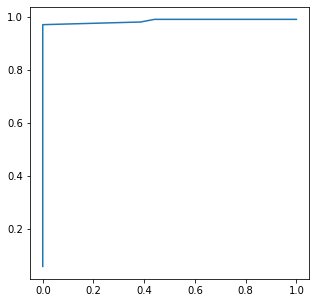

In [ ]:
chi_h(chi2)

Оценка ошибки второго рода для p < 0.001 равна 0.98


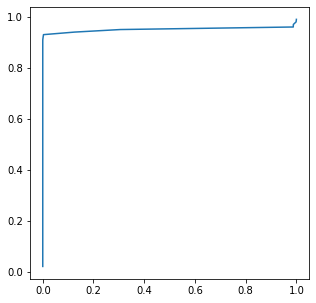

In [ ]:
chi_h(chi3)

##### Применим критерий знаков к выборкам.

In [ ]:
def sign_test(X, Y):
    xi = 0
    for i in range(100):
        if X[i] < Y[i]:
            xi += 1
    return sts.binom.cdf(k = xi, n = 100, p = 1/2)

In [ ]:
s1 = [sign_test(d5[i], d0[i]) for i in range(100)]
s2 = [sign_test(d6[i], d0[i]) for i in range(100)]
s3 = [sign_test(d7[i], d0[i]) for i in range(100)]

In [ ]:
def s_t(s):
    fig = plt.figure(figsize=(5, 5))
    F_ = Fn_pvalue(s)
    plt.plot(F_[0], F_[1])

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.87


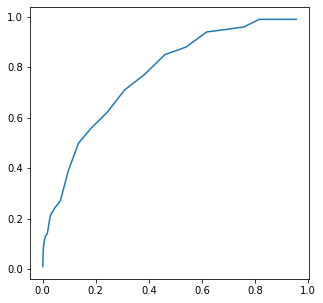

In [ ]:
s_t(s1)

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.98


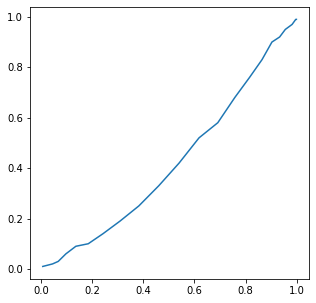

In [ ]:
s_t(s2)

Оценка ошибки второго рода для 0.01 < p < 0.05 равна 0.9299999999999999


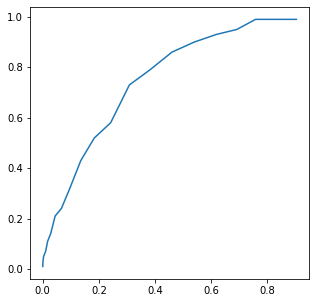

In [ ]:
s_t(s3)